In [483]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#using matplotlib’s ggplot style
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition,linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier,Lasso,LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_auc_score,precision_recall_curve,roc_curve,auc
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier

In [484]:
path ='/Users/gyang/Desktop/yang_project/capstone/data/'

## Independent Variable

In [411]:
total = pd.read_csv(path + 'all_year_with_target.csv')

In [419]:
#total.columns.values

In [414]:
total.head()

,GeoName,year,Compensation of employees,Gross domestic product (GDP) by state,Gross operating surplus,Per capita real GDP by state,Quantity indexes for real GDP by state,Real GDP by state,Subsidies,Taxes on production and imports,...,Equals: Disposable personal income,Personal current taxes,state,contract_establish,end_establish,expand_establish,net_change,open_establish,total_contract,total_expand
0,Alabama,1997,61240,104309.0,36814,31465.0,81.042,137437.0,-328,6582,...,83209782.0,10612417.0,Alabama,648756,138914,654734,41822,174758,787670,829492
1,Alaska,1997,12205,25763.0,11234,62577.0,75.935,38358.0,-62,2386,...,15203610.0,1844364.0,Alaska,158148,37718,168904,15276,42238,195866,211142
2,Arizona,1997,69886,132795.0,54249,34485.0,67.195,163353.0,-383,9044,...,94533284.0,12903928.0,Arizona,833670,228694,1013832,198484,247016,1062364,1260848
3,Arkansas,1997,32852,60248.0,23415,30470.0,79.178,79256.0,-298,4279,...,46699786.0,5709269.0,Arkansas,371418,86722,412804,49658,94994,458140,507798
4,California,1997,574394,1082051.0,441963,41314.0,70.134,1342133.0,-5725,71419,...,761138752.0,120765010.0,California,6281922,2167120,7002930,605040,2051152,8449042,9054082


In [447]:
state_list =total.GeoName.unique().tolist()

In [448]:
def clean_state_data(st_name):
    df_1 =total.loc[total['GeoName'] == st_name]
    df_2 =df_1.set_index(['GeoName','year'])
    df_3_1 =df_2.replace({'(NA)': np.nan ,'(L)':np.nan ,0:np.nan})
    df_3 =df_3_1.drop(columns =['state','expand_establish'])
    
    
    #check missing value 

    miss_col = df_3
    miss_col2 = miss_col.isnull().sum(axis =0)/float(len(miss_col))
    miss_col3 =miss_col2.sort_values(ascending=False)
    
    columns = df_3.columns
    missing_value_df = pd.DataFrame({'percent_missing': miss_col3})
    missing_value_df['percent_missing'] =missing_value_df['percent_missing'].astype('float64')
    
    miss_col =missing_value_df.loc[(missing_value_df['percent_missing'] >0) 
                               &(missing_value_df['percent_missing'] <0.4)].index.tolist()
    
    #drop columns with large missing
    del_list = missing_value_df.loc[(missing_value_df['percent_missing'] >=0.4)].index.tolist()
    df_4 = df_3.drop(columns=del_list)

    #convert NAN to -99999
    df_5 = df_4.fillna(-99999)

    #change type of columns
    convert_col =df_5.select_dtypes(include=['object']).columns.values

    for i in convert_col:
        df_5[i] = df_5[i].astype('float')

    df_6 = df_5.copy()

    #replace -99999 to mean()
    for i in miss_col:
        df_6[i] =df_6[i].replace({-99999: df_6[i].mean()})

    df_7 = df_6.copy()

    #numerical feature scaling
    scaler = MinMaxScaler()
    col =df_7.columns.values
    df_7[col] = scaler.fit_transform(df_7[col])
    
    return df_7

In [449]:
Alabama =clean_state_data(state_list[0])
Alaska =clean_state_data(state_list[1])
Arizona =clean_state_data(state_list[2])
Arkansas =clean_state_data(state_list[3])
California =clean_state_data(state_list[4])

Colorado =clean_state_data(state_list[5])
Connecticut =clean_state_data(state_list[6])
Delaware =clean_state_data(state_list[7])
Florida =clean_state_data(state_list[8])
Georgia =clean_state_data(state_list[9])

Hawaii =clean_state_data(state_list[10])
Idaho =clean_state_data(state_list[11])
Illinois =clean_state_data(state_list[12])
Indiana =clean_state_data(state_list[13])
Iowa =clean_state_data(state_list[14])

Kansas =clean_state_data(state_list[15])
Kentucky =clean_state_data(state_list[16])
Louisiana =clean_state_data(state_list[17])
Maine =clean_state_data(state_list[18])
Maryland =clean_state_data(state_list[19])

Massachusetts =clean_state_data(state_list[20])
Michigan =clean_state_data(state_list[21])
Minnesota =clean_state_data(state_list[22])
Mississippi =clean_state_data(state_list[23])
Missouri =clean_state_data(state_list[24])

Montana =clean_state_data(state_list[25])
Nebraska =clean_state_data(state_list[26])
Nevada =clean_state_data(state_list[27])
NewHampshire =clean_state_data(state_list[28])
NewJersey =clean_state_data(state_list[29])

NewMexico =clean_state_data(state_list[30])
NewYork =clean_state_data(state_list[31])
NorthCarolina =clean_state_data(state_list[32])
NorthDakota =clean_state_data(state_list[33])
Ohio =clean_state_data(state_list[34])

Oklahoma =clean_state_data(state_list[35])
Oregon =clean_state_data(state_list[36])
Pennsylvania =clean_state_data(state_list[37])
RhodeIsland =clean_state_data(state_list[38])
SouthCarolina =clean_state_data(state_list[39])

SouthDakota =clean_state_data(state_list[40])
Tennessee =clean_state_data(state_list[41])
Texas =clean_state_data(state_list[42])
Utah =clean_state_data(state_list[43])
Vermont =clean_state_data(state_list[44])

Virginia =clean_state_data(state_list[45])
Washington =clean_state_data(state_list[46])
WestVirginia =clean_state_data(state_list[47])
Wisconsin =clean_state_data(state_list[48])
Wyoming =clean_state_data(state_list[49])

DC =clean_state_data(state_list[50])

In [451]:
# split data
def split_data(data):
    x_train,x_test =data.iloc[1:15,],data.iloc[15:,]
    return x_train,x_test

In [452]:
# split data

x_train_alabama,x_test_alabama =split_data(Alabama)
x_train_alaska,x_test_alaska =split_data(Alaska)
x_train_arizona,x_test_arizona =split_data(Arizona)
x_train_arkansas,x_test_arkansas =split_data(Arkansas)
x_train_california,x_test_california =split_data(California)
x_train_colorado,x_test_colorado =split_data(Colorado)
x_train_connecticut,x_test_connecticut =split_data(Connecticut)
x_train_delaware,x_test_delaware =split_data(Delaware)
x_train_dc,x_test_dc =split_data(DC)
x_train_florida,x_test_florida =split_data(Florida)
x_train_georgia,x_test_georgia =split_data(Georgia)
x_train_hawaii,x_test_hawaii =split_data(Hawaii)
x_train_idaho,x_test_idaho =split_data(Idaho)
x_train_illinois,x_test_illinois =split_data(Illinois)
x_train_indiana,x_test_indiana =split_data(Indiana)
x_train_iowa,x_test_iowa =split_data(Iowa)
x_train_kansas,x_test_kansas =split_data(Kansas)
x_train_kentucky,x_test_kentucky =split_data(Kentucky)
x_train_louisiana,x_test_louisiana =split_data(Louisiana)
x_train_maine,x_test_maine =split_data(Maine)
x_train_maryland,x_test_maryland =split_data(Maryland)
x_train_massachusetts,x_test_massachusetts =split_data(Massachusetts)
x_train_michigan,x_test_michigan =split_data(Michigan)
x_train_minnesota,x_test_minnesota =split_data(Minnesota)
x_train_mississippi,x_test_mississippi =split_data(Mississippi)
x_train_missouri,x_test_missouri =split_data(Missouri)
x_train_nebraska,x_test_nebraska =split_data(Nebraska)
x_train_nevada,x_test_nevada =split_data(Nevada)
x_train_newhampshire,x_test_newhampshire =split_data(NewHampshire)
x_train_newjersey,x_test_newjersey =split_data(NewJersey)
x_train_newmexico,x_test_newmexico =split_data(NewMexico)
x_train_newyork,x_test_newyork =split_data(NewYork)
x_train_northcarolina,x_test_northcarolina =split_data(NorthCarolina)
x_train_northdakota,x_test_northdakota =split_data(NorthDakota)
x_train_ohio,x_test_ohio =split_data(Ohio)
x_train_oklahoma,x_test_oklahoma =split_data(Oklahoma)
x_train_oregon,x_test_oregon =split_data(Oregon)
x_train_pennsylvania,x_test_pennsylvania =split_data(Pennsylvania)
x_train_rhodeisland,x_test_rhodeisland =split_data(RhodeIsland)
x_train_southcarolina,x_test_southcarolina =split_data(SouthCarolina)
x_train_southdakota,x_test_southdakota =split_data(SouthDakota)
x_train_tennessee,x_test_tennessee =split_data(Tennessee)
x_train_texas,x_test_texas =split_data(Texas)
x_train_utah,x_test_utah =split_data(Utah)
x_train_vermont,x_test_vermont =split_data(Vermont)
x_train_virginia,x_test_virginia =split_data(Virginia)
x_train_washington,x_test_washington =split_data(Washington)
x_train_westvirginia,x_test_westvirginia =split_data(WestVirginia)
x_train_wisconsin,x_test_wisconsin =split_data(Wisconsin)
x_train_utah,x_test_utah =split_data(Utah)
x_train_wyoming,x_test_wyoming =split_data(Wyoming)

## Dependent Variable (SME Growth) 

SME Growth Increase (Comapare with last year) =1;Decrease =0 <br\>
1997 ~2016 Year

In [302]:
#PATH2 ='/Users/gyang/Desktop/yang_project/capstone/data/dependent_variable_state_data_cleaned/'

In [375]:
#al_df =pd.read_table(PATH2+'Alabama.txt',sep='/',header=None)
#al_df.columns=['year','month','net_change','total_expand','expand_establish',
#                'open_establish','total_contract','contract_establish','end_establish']
#al_year = al_df.groupby(['year'], as_index=False)[['expand_establish']].mean()
#al_year['year'] = al_year['year'].astype('int64')

In [468]:
target_df =total[['year','GeoName','expand_establish']]
al_year =target_df.loc[target_df['GeoName'] =='Alabama']
al_year['lag_growth'] = al_year['expand_establish'].shift(1)
al_year2 =al_year.loc[al_year['year'] != 1997]

al_year2['growth_change'] =al_year2['expand_establish'] - al_year2['lag_growth']

#create dependent variable
al_year2['growth_trend'] = np.where(al_year2['growth_change'] >=0, 1, 0)
al_year2['growth_trend'] = al_year2['growth_trend'].astype('int')

al_year3 =al_year2[['year','growth_trend']].set_index(['year'])

#split train and test data
y_train_alabama, y_test_alabama =np.array(al_year3.iloc[:14,]).ravel() ,np.array(al_year3.iloc[14:,]).ravel()

/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [469]:
y_train_alabama

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [470]:
print(y_train_alabama.shape)
print(y_test_alabama.shape)

(14,)
(5,)


# Data Modeling

## Random Forest

In [526]:
#random forest
rfc = RandomForestClassifier(random_state=42)

rfc.fit(x_train_alabama, y_train_alabama)
y_pred_rfc = rfc.predict(x_test_alabama)

In [527]:
rfc_acc =accuracy_score(y_test_alabama, y_pred_rfc)
rfc_acc

1.0

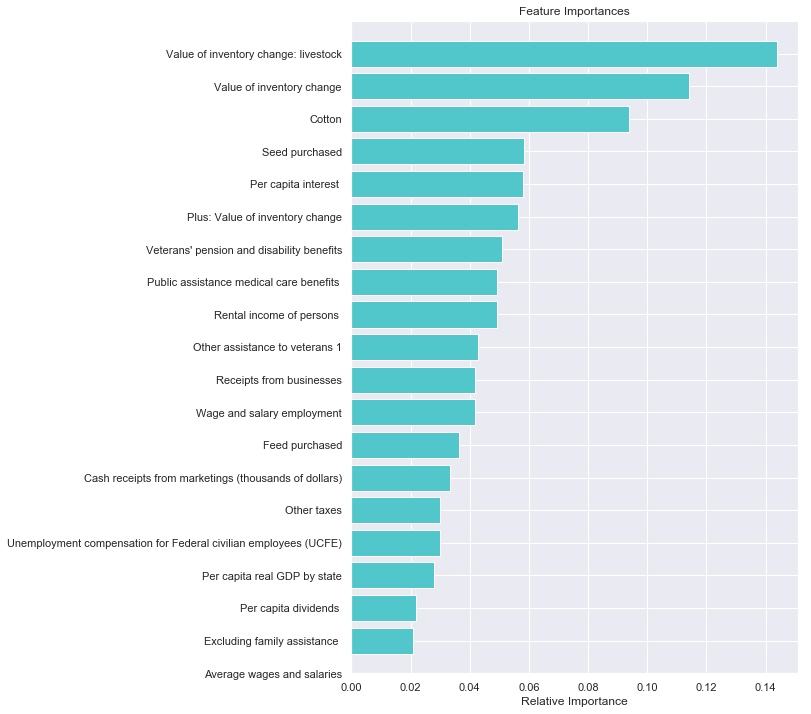

In [528]:
### Feature selection
feature_importances_rf = pd.DataFrame(rfc.feature_importances_,index = x_train_alabama.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)

# feature importance plot
importances_rf = rfc.feature_importances_
indices_rf = np.argsort(importances_rf)

plt.figure(figsize=(8,12))
plt.title('Feature Importances')
plt.xlabel('Relative Importance')

top_n =20
plt.barh(np.arange(top_n), importances_rf[indices_rf[-top_n:]],color='#51C7CB')

plt.yticks(np.arange(top_n), x_train_alabama.columns[indices_rf[-top_n:]])
plt.ylim(0, top_n)

plt.show()

In [529]:
#Top 30 important features
select_feature_list =feature_importances_rf[:30].index.tolist()
select_feature_list

['Value of inventory change: livestock',
 'Value of inventory change',
 'Cotton',
 'Seed purchased',
 'Per capita interest ',
 'Plus: Value of inventory change',
 "Veterans' pension and disability benefits",
 'Public assistance medical care benefits ',
 'Rental income of persons ',
 'Other assistance to veterans 1',
 'Receipts from businesses',
 'Wage and salary employment',
 'Feed purchased',
 'Cash receipts from marketings (thousands of dollars)',
 'Other taxes',
 'Unemployment compensation for Federal civilian employees (UCFE)',
 'Per capita real GDP by state',
 'Per capita dividends ',
 'Excluding family assistance ',
 'Greenhouse, nursery and mushroom products',
 'Hay, silage, etc.',
 'Education and training assistance 1',
 'Meat animals and other livestock',
 'Other crops',
 "Veterans' readjustment benefits ",
 'Dairy products',
 'Poultry and poultry products',
 'Total grains',
 'Vegetables',
 'All other production expenses ']

In [530]:
x_train_alabama_res, x_test_alabama_res =x_train_alabama.loc[:, select_feature_list],x_test_alabama.loc[:, select_feature_list]

In [531]:
x_train_alabama_res.shape

(14, 30)

In [532]:
#random forest
rf_classifer = RandomForestClassifier(random_state=42)

rf_classifer.fit(x_train_alabama_res, y_train_alabama)
y_pred_rfc_res = rf_classifer.predict(x_test_alabama_res)

In [533]:
rfc_acc_res =accuracy_score(y_test_alabama, y_pred_rfc_res)
rfc_acc_res

0.59999999999999998

## Xgboost

In [523]:
xgb =XGBClassifier(n_estimators=5,seed=42)

In [524]:
xgb.fit(x_train_alabama, y_train_alabama)

y_pred_xgb = xgb.predict(x_test_alabama)

In [525]:
xgb_acc =accuracy_score(y_test_alabama, y_pred_xgb)
xgb_acc

0.40000000000000002